## Task 3.1 

### 3.1.1 Load the RTA and trade data


In [1]:
import pandas as pd
import io
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tradedata = pd.read_csv("Question3_trade_data.csv", encoding='ISO-8859-1')
rta= pd.read_excel("Question3_rta_data.xlsx")

In [3]:
rta.head(2)

,id,name,coverage,type,date_entry_into_force,composition,region,crossregional,parties
0,315,United Kingdom - Cameroon,Goods,FTA,2021-01-01,Bilateral,Africa; Europe,Yes,Cameroon; United Kingdom
1,174,"Hong Kong, China - New Zealand",Goods & Services,FTA & EIA,2011-01-01,Bilateral,East Asia; Oceania,Yes,"Hong Kong, China; New Zealand"


In [4]:
rta.shape

(219, 9)

In [5]:
tradedata.head(2)

,reporter,partner,flow,year_2009,year_2019,year_2014
0,Afghanistan,Albania,import,2408.0,NaN,NaN
1,Afghanistan,Argentina,import,NaN,225424.0,NaN


In [6]:
tradedata.shape

(28405, 6)

### 3.1.2 Cleaning data


In [7]:
# Check for missing values in rta
print(rta.isnull().sum())

# Check for missing values in tradedata
print(tradedata.isnull().sum())


id                       0
name                     0
coverage                 0
type                     0
date_entry_into_force    0
composition              0
region                   0
crossregional            0
parties                  0
dtype: int64
reporter        0
partner         0
flow            0
year_2009    6357
year_2019    4468
year_2014    5607
dtype: int64


In [8]:
# Check data types
print(rta.dtypes)
print(tradedata.dtypes)


id                                int64
name                             object
coverage                         object
type                             object
date_entry_into_force    datetime64[ns]
composition                      object
region                           object
crossregional                    object
parties                          object
dtype: object
reporter      object
partner       object
flow          object
year_2009    float64
year_2019    float64
year_2014    float64
dtype: object


In [9]:
# Check unique values 
rta['id'].nunique()

219

In [10]:
rta['coverage'].drop_duplicates()

0               Goods
1    Goods & Services
Name: coverage, dtype: object

In [11]:
rta['type'].drop_duplicates()

0            FTA
1      FTA & EIA
13           PSA
35            CU
139     CU & EIA
162    PSA & EIA
Name: type, dtype: object

In [12]:
rta['composition'].drop_duplicates()

0                             Bilateral
9                          Plurilateral
10       Bilateral; One Party is an RTA
23      Bilateral; All Parties are RTAs
75    Plurilateral; One Party is an RTA
Name: composition, dtype: object

In [13]:
rta['name'].drop_duplicates()

0                              United Kingdom - Cameroon
1                         Hong Kong, China - New Zealand
2                                      China - Mauritius
3                             United Kingdom - Singapore
4                                       Mexico - Uruguay
                             ...                        
214           Chile - Honduras (Chile - Central America)
215                            EU - Moldova, Republic of
216    United States-Mexico-Canada Agreement (USMCA/C...
217                                  Pakistan - Malaysia
218    Treaty on a Free Trade Area between members of...
Name: name, Length: 219, dtype: object

### 3.1.3 Processing data

In [14]:
# For RTA dataset
## Split col: date_entry_into_force into month and year columns
rta['Month'] = rta['date_entry_into_force'].dt.month
rta['Year'] = rta['date_entry_into_force'].dt.year


In [15]:
# Split the 'type' column into two new columns 'type_1' and 'type_2'
rta[['RTA_1', 'RTA_2']] = rta['type'].str.split('&', expand=True)
# Remove leading and trailing spaces
rta['RTA_1'] = rta['RTA_1'].str.strip()
rta['RTA_2'] = rta['RTA_2'].str.strip()

In [16]:
# Split the 'coverage' column into two new columns 'goods' and 'services'
rta[['goods', 'services']] = rta['coverage'].str.split('&', expand=True)
# Remove leading and trailing spaces
rta['goods'] = rta['goods'].str.strip()
rta['services'] = rta['services'].str.strip()

In [17]:
# Split the 'parties' column into individual elements
split_parties = rta['parties'].str.split(';', expand=True)

#  Count the occurrences of each unique element
party_counts = split_parties.stack().value_counts()


In [18]:
# For trade  dataset
## Merging cols: reporter and partners, with a seperfator ; 
# Ensure the columns are strings
tradedata['reporter'] = tradedata['reporter'].astype(str)
tradedata['partner'] = tradedata['partner'].astype(str)

# Merge the columns with a separator
tradedata['reporter_partner'] = tradedata['reporter'] + ' - ' + tradedata['partner']


In [19]:
tradedata['reporter_partner'].value_counts()

reporter_partner
Madagascar - Iceland        2
Niger - Uganda              2
Niger - Serbia              2
Niger - Sierra Leone        2
Niger - Singapore           2
                           ..
Seychelles - Zimbabwe       1
Sierra Leone - Albania      1
Sierra Leone - Argentina    1
Sierra Leone - Armenia      1
Afghanistan - Albania       1
Name: count, Length: 15957, dtype: int64

In [20]:
tradedata.head(2)

,reporter,partner,flow,year_2009,year_2019,year_2014,reporter_partner
0,Afghanistan,Albania,import,2408.0,NaN,NaN,Afghanistan - Albania
1,Afghanistan,Argentina,import,NaN,225424.0,NaN,Afghanistan - Argentina


In [21]:
# Trade volume grouped by reporter per year
total_trade_per_year_reporter_2009 = tradedata.groupby(['reporter'])['year_2009'].sum().reset_index()
total_trade_per_year_reporter_2014 = tradedata.groupby(['reporter'])['year_2014'].sum().reset_index()
total_trade_per_year_reporter_2019 = tradedata.groupby(['reporter'])['year_2019'].sum().reset_index()

In [22]:
# Merge the data frames on the 'reporter' column
merged_total_trade_per_year_reporter = total_trade_per_year_reporter_2009.merge(
    total_trade_per_year_reporter_2014, on='reporter', suffixes=('_2009', '_2014')
).merge(
    total_trade_per_year_reporter_2019, on='reporter'
)

merged_total_trade_per_year_reporter['Total_trade'] = merged_total_trade_per_year_reporter[['year_2009', 'year_2014', 'year_2019']].sum(axis=1)

In [23]:
merged_total_trade_per_year_reporter

,reporter,year_2009,year_2014,year_2019,Total_trade
0,Afghanistan,4.133071e+09,4.884522e+09,9.694974e+09,1.871257e+10
1,Albania,3.486705e+09,4.707783e+09,5.485074e+09,1.367956e+10
2,Angola,6.467351e+10,7.390836e+10,4.516396e+10,1.837458e+11
3,Antigua and Barbuda,5.647302e+08,4.093167e+08,5.185914e+08,1.492638e+09
4,Argentina,8.357040e+10,1.237260e+11,1.074764e+11,3.147728e+11
...,...,...,...,...,...
131,Vanuatu,3.092752e+08,0.000000e+00,0.000000e+00,3.092752e+08
132,"Venezuela, Bolivarian Republic of",4.216321e+10,0.000000e+00,0.000000e+00,4.216321e+10
133,Viet Nam,1.240148e+11,2.871137e+11,4.868372e+11,8.979657e+11
134,Zambia,7.716230e+09,1.995781e+10,1.478073e+10,4.245477e+10


In [24]:
total_trade_per_year_partner_2009 = tradedata.groupby(['reporter_partner'])['year_2009'].sum().reset_index()
total_trade_per_year_partner_2014 = tradedata.groupby(['reporter_partner'])['year_2014'].sum().reset_index()
total_trade_per_year_partner_2019 = tradedata.groupby(['reporter_partner'])['year_2019'].sum().reset_index()


In [25]:
# Combine the data into a single DataFrame for easy plotting
total_trade_per_year = pd.merge(total_trade_per_year_partner_2009, 
                                total_trade_per_year_partner_2014, 
                                on='reporter_partner', 
                                suffixes=('_2009', '_2014'))

total_trade_per_year = pd.merge(total_trade_per_year, 
                                total_trade_per_year_partner_2019, 
                                on='reporter_partner')

total_trade_per_year.columns = ['reporter_partner', 'trade_2009', 'trade_2014', 'trade_2019']


In [26]:
total_trade_per_year

,reporter_partner,trade_2009,trade_2014,trade_2019
0,Afghanistan - Albania,2408.0,0.0,0.0
1,Afghanistan - Argentina,0.0,0.0,225424.0
2,Afghanistan - Australia,1365592.0,0.0,15194328.0
3,Afghanistan - Azerbaijan,4971358.0,0.0,58252938.0
4,"Afghanistan - Bahrain, Kingdom of",0.0,0.0,265176.0
...,...,...,...,...
15952,Zimbabwe - Uruguay,268795.0,316539.0,450554.0
15953,Zimbabwe - Uzbekistan,626049.0,0.0,0.0
15954,"Zimbabwe - Venezuela, Bolivarian Republic of",196997.0,0.0,0.0
15955,Zimbabwe - Viet Nam,1534876.0,1121554.0,283769.0


## Task 3.2 Exploratory data analysis and data visualization


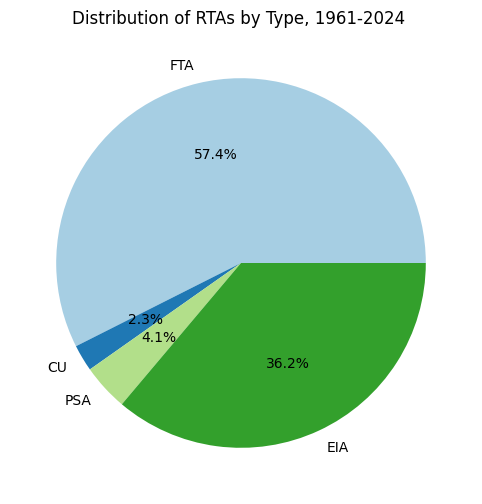

In [27]:
# Combine the two columns into a single series
counts= pd.concat([rta['RTA_1'], rta['RTA_2']]).dropna().value_counts()
# Filter counts for FTA, CU, PSA, EIA
specific_counts = counts[['FTA', 'CU', 'PSA', 'EIA']]
# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(specific_counts, labels=specific_counts.index, autopct='%1.1f%%',colors=plt.cm.Paired(range(4) ))
#colors=['#66b3ff','#99ff99','#ffcc99','#ff9999']
# Adding title
plt.title('Distribution of RTAs by Type, 1961-2024 ')
# Show the pie chart
plt.show()


In [28]:
rta['composition'].unique()

array(['Bilateral', 'Plurilateral', 'Bilateral; One Party is an RTA',
       'Bilateral; All Parties are RTAs',
       'Plurilateral; One Party is an RTA'], dtype=object)

Text(0.5, 1.0, 'Distribution of RTAs by Composition, 1961-2024')

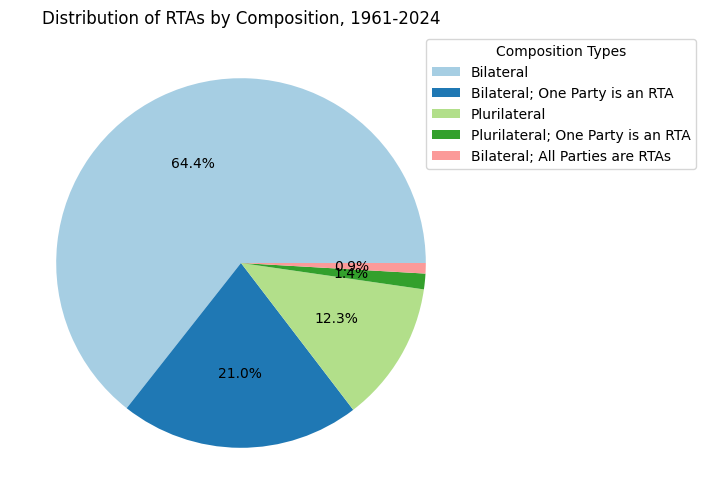

In [29]:
# Count the occurrences of each unique value in the 'composition' column
composition_counts = rta['composition'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(composition_counts, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(composition_counts))))
plt.legend(composition_counts.index, title="Composition Types", loc="upper right", bbox_to_anchor=(1.5, 1))
# Add a title
plt.title('Distribution of RTAs by Composition, 1961-2024')

Text(0.5, 1.0, 'Distribution of RTAs by Crossregional, 1961-2024')

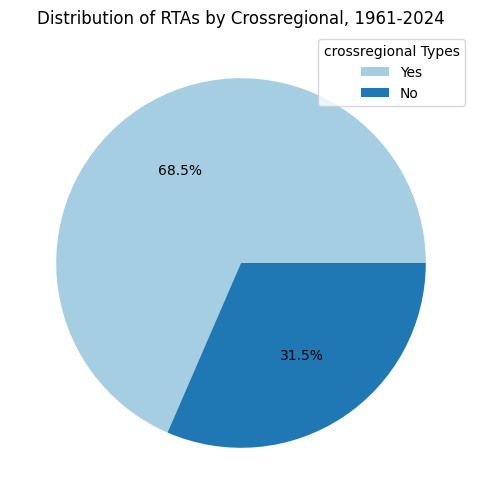

In [30]:
# Count the occurrences of each unique value in the 'composition' column
crossregional_counts = rta['crossregional'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(crossregional_counts, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(composition_counts))))
plt.legend(crossregional_counts.index, title="crossregional Types", loc="upper right", bbox_to_anchor=(1, 1))
# Add a title
plt.title('Distribution of RTAs by Crossregional, 1961-2024')


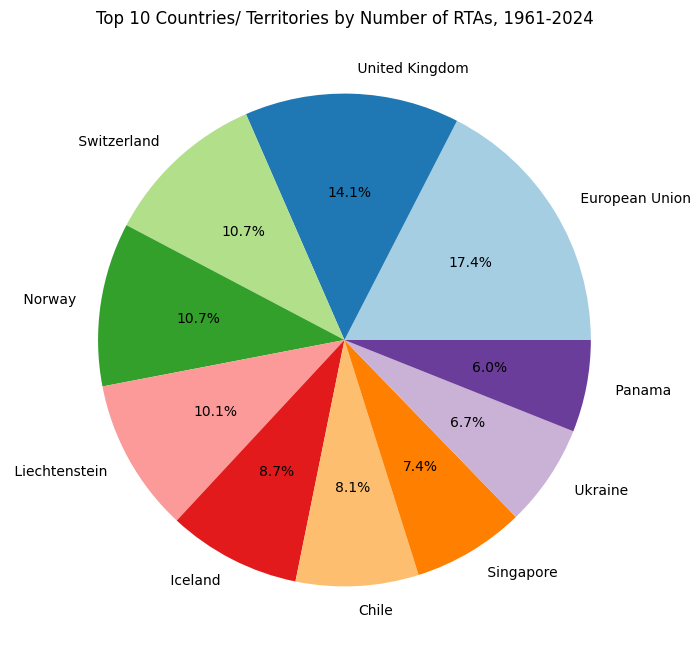

In [31]:
# Sort the party counts in descending order and select the top 20
top_10_parties = party_counts.nlargest(10)

# Plot the pie chart for the top 10 parties
plt.figure(figsize=(10, 8))
plt.pie(top_10_parties, labels=top_10_parties.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(20)))

# Adding title
plt.title('Top 10 Countries/ Territories by Number of RTAs, 1961-2024')
# Show the pie chart
plt.show()


In [32]:

rta_counts_per_year_perpair = rta.groupby(['name','Year']).size().reset_index(name='count')
rta_counts_per_year_perpair

,name,Year,count
0,ASEAN - China,2005,1
1,ASEAN - India,2010,1
2,"ASEAN - Korea, Republic of",2009,1
3,ASEAN Free Trade Area (AFTA),1998,1
4,Agadir Agreement,2007,1
...,...,...,...
214,United States - Oman,2009,1
215,United States - Panama,2012,1
216,United States - Peru,2009,1
217,United States-Mexico-Canada Agreement (USMCA/C...,2020,1


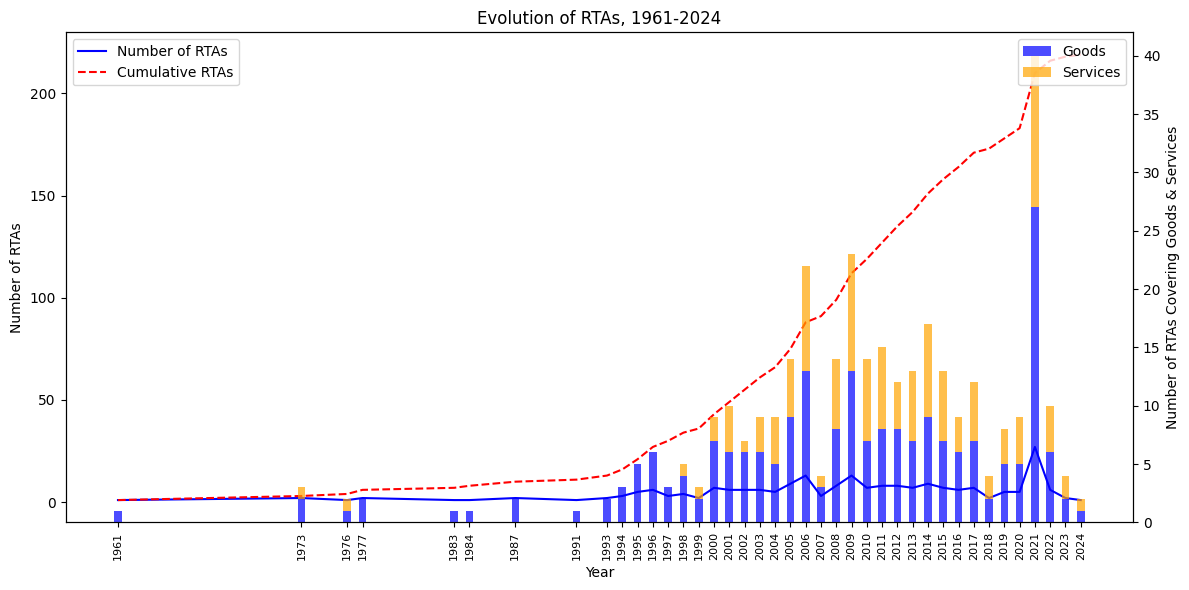

In [33]:
rta_counts_per_year = rta.groupby('Year').size()
cumulative_rta_counts = rta_counts_per_year.cumsum()


goods_per_year = rta[rta['goods'].notna()].groupby('Year').size()
services_per_year = rta[rta['services'].notna()].groupby('Year').size()
years = rta_counts_per_year.index
goods_per_year = goods_per_year.reindex(years, fill_value=0)
services_per_year = services_per_year.reindex(years, fill_value=0)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the line chart for RTAs and Cumulative RTAs
ax1.plot(rta_counts_per_year.index, rta_counts_per_year.values, linestyle='-', color='b', label='Number of RTAs')
ax1.plot(cumulative_rta_counts.index, cumulative_rta_counts.values, linestyle='--', color='r', label='Cumulative RTAs')

# Add title and labels
ax1.set_title('Evolution of RTAs, 1961-2024')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of RTAs')
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=90, fontsize=8)

# Add legend for the line plot
ax1.legend(loc='upper left')

# Create a second y-axis for the stacked bar chart
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot the stacked bar chart
ax2.bar(years, goods_per_year.values, color='blue', width=0.5, label='Goods', alpha=0.7)
ax2.bar(years, services_per_year.values, color='orange', width=0.5, bottom=goods_per_year.values, label='Services', alpha=0.7)

# Add labels for the stacked bar chart
ax2.set_ylabel('Number of RTAs Covering Goods & Services')

# Add legend for the bar chart
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


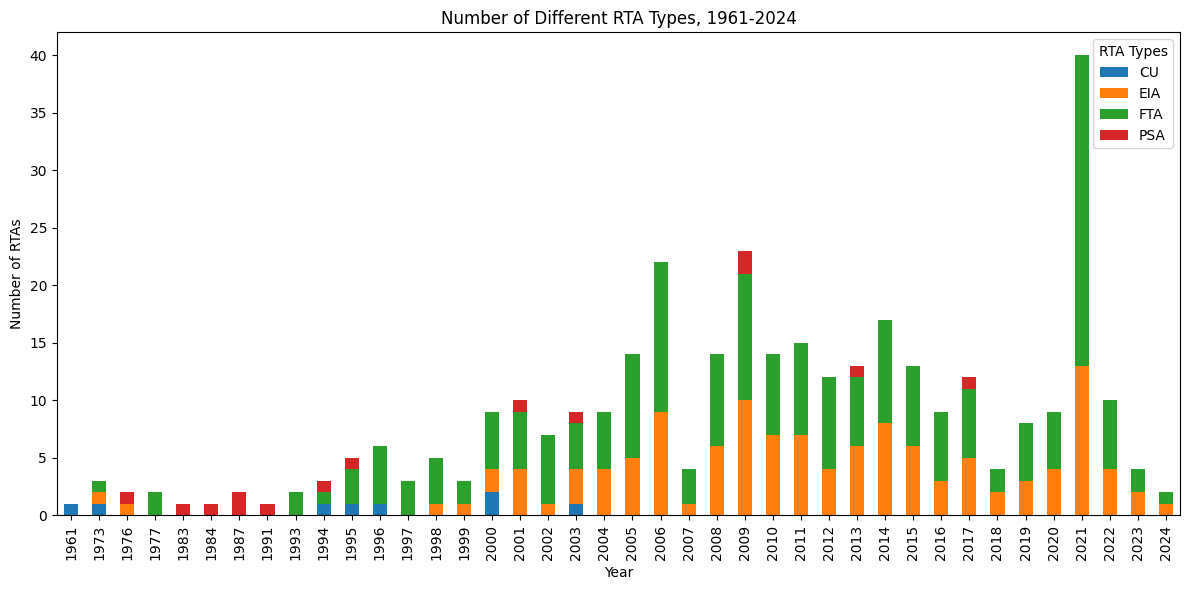

In [34]:

# Combine the two columns into a single series and count occurrences of each RTA type
combined_rta_types = pd.concat([rta['RTA_1'], rta['RTA_2']]).dropna()
counts_per_type = combined_rta_types.value_counts()

# Create a DataFrame with counts for each RTA type by year
rta_types_by_year = rta[['Year', 'RTA_1', 'RTA_2']].copy()
rta_types_by_year = pd.melt(rta_types_by_year, id_vars=['Year'], value_vars=['RTA_1', 'RTA_2'])
rta_types_by_year = rta_types_by_year.dropna()
rta_types_by_year = rta_types_by_year.groupby(['Year', 'value']).size().unstack(fill_value=0)

# Plot the bar chart
plt.figure(figsize=(12, 6))


# Plot each type as a separate bar
rta_types_by_year.plot(kind='bar', stacked=True, ax=plt.gca())

# Adding title and labels
plt.title('Number of Different RTA Types, 1961-2024')
plt.xlabel('Year')
plt.ylabel('Number of RTAs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add legend
plt.legend(title='RTA Types')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


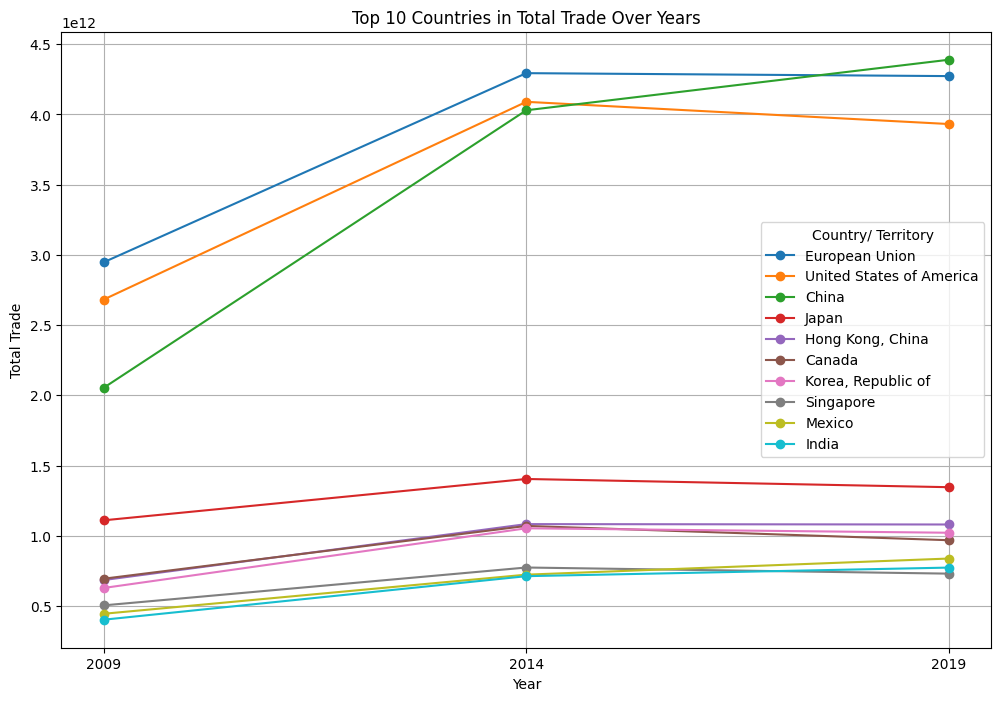

In [35]:
# Select top 10 countries by Total_trade (if more than 10 countries, adjust accordingly)
top_10_countries = merged_total_trade_per_year_reporter.nlargest(10, 'Total_trade')

# Set the reporter as the index for easier plotting
top_10_countries.set_index('reporter', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each country's total trade over the years
for country in top_10_countries.index:
    plt.plot(['2009', '2014', '2019'], 
             top_10_countries.loc[country, ['year_2009', 'year_2014', 'year_2019']],
             marker='o', label=country)

plt.title('Top 10 Countries in Total Trade Over Years')
plt.xlabel('Year')
plt.ylabel('Total Trade')
plt.legend(title='Country/ Territory')
plt.grid(True)
plt.show()


In [36]:
# Calculate total trade across all reporter_partner for each year
total_trade = total_trade_per_year[['trade_2009', 'trade_2014', 'trade_2019']].sum()

# Calculate the share of each reporter_partner for each year
total_trade_per_year['share_2009'] = total_trade_per_year['trade_2009'] / total_trade['trade_2009']
total_trade_per_year['share_2014'] = total_trade_per_year['trade_2014'] / total_trade['trade_2014']
total_trade_per_year['share_2019'] = total_trade_per_year['trade_2019'] / total_trade['trade_2019']

# Prepare data for plotting
plot_data = total_trade_per_year.melt(id_vars='reporter_partner', 
                                       value_vars=['share_2009', 'share_2014', 'share_2019'],
                                       var_name='Year', 
                                       value_name='Share')

plot_data['Year'] = plot_data['Year'].str.replace('share_', '')


In [37]:
total_trade_per_year

,reporter_partner,trade_2009,trade_2014,trade_2019,share_2009,share_2014,share_2019
0,Afghanistan - Albania,2408.0,0.0,0.0,1.384049e-10,0.000000e+00,0.000000e+00
1,Afghanistan - Argentina,0.0,0.0,225424.0,0.000000e+00,0.000000e+00,8.152827e-09
2,Afghanistan - Australia,1365592.0,0.0,15194328.0,7.849027e-08,0.000000e+00,5.495277e-07
3,Afghanistan - Azerbaijan,4971358.0,0.0,58252938.0,2.857393e-07,0.000000e+00,2.106813e-06
4,"Afghanistan - Bahrain, Kingdom of",0.0,0.0,265176.0,0.000000e+00,0.000000e+00,9.590523e-09
...,...,...,...,...,...,...,...
15952,Zimbabwe - Uruguay,268795.0,316539.0,450554.0,1.544956e-08,1.149743e-08,1.629502e-08
15953,Zimbabwe - Uzbekistan,626049.0,0.0,0.0,3.598348e-08,0.000000e+00,0.000000e+00
15954,"Zimbabwe - Venezuela, Bolivarian Republic of",196997.0,0.0,0.0,1.132282e-08,0.000000e+00,0.000000e+00
15955,Zimbabwe - Viet Nam,1534876.0,1121554.0,283769.0,8.822023e-08,4.073743e-08,1.026297e-08


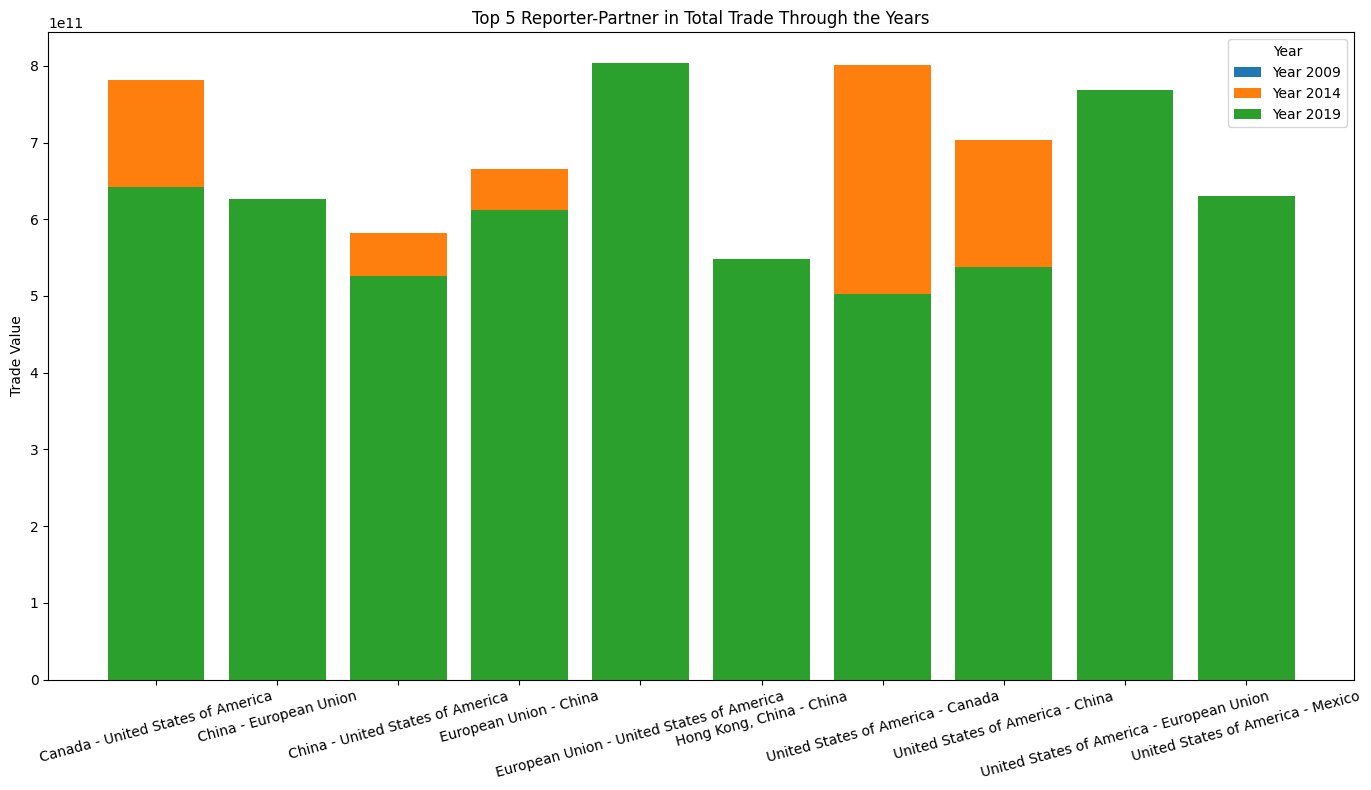

In [38]:
# Calculate the total trade value across all years for each reporter-partner
total_trade_per_reporter_partner = total_trade_per_year[['trade_2009', 'trade_2014', 'trade_2019']].sum(axis=1)
total_trade_per_year['total_trade'] = total_trade_per_reporter_partner

# Get the top 5 reporter-partner pairs based on total trade
top_5_reporter_partner = total_trade_per_year.nlargest(10, 'total_trade')['reporter_partner']

# Filter the data to include only the top 10 reporter-partner pairs
top_5_data = total_trade_per_year[total_trade_per_year['reporter_partner'].isin(top_5_reporter_partner)]

# Prepare data for plotting
plot_data = top_5_data.melt(id_vars='reporter_partner', 
                            value_vars=['trade_2009', 'trade_2014', 'trade_2019'],
                            var_name='Year', 
                            value_name='Trade_Value')

plot_data['Year'] = plot_data['Year'].str.replace('trade_', '')
# Plot the data
plt.figure(figsize=(14, 8))

# Create bar plots for each year
for year in ['2009', '2014', '2019']:
    data_year = plot_data[plot_data['Year'] == year]
    plt.bar(data_year['reporter_partner'], data_year['Trade_Value'], label=f'Year {year}')
# Adding title and labels
plt.title('Top 5 Reporter-Partner in Total Trade Through the Years')
plt.ylabel('Trade Value')
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
# Add legend
plt.legend(title='Year')
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [39]:
total_trade_per_year

,reporter_partner,trade_2009,trade_2014,trade_2019,share_2009,share_2014,share_2019,total_trade
0,Afghanistan - Albania,2408.0,0.0,0.0,1.384049e-10,0.000000e+00,0.000000e+00,2408.0
1,Afghanistan - Argentina,0.0,0.0,225424.0,0.000000e+00,0.000000e+00,8.152827e-09,225424.0
2,Afghanistan - Australia,1365592.0,0.0,15194328.0,7.849027e-08,0.000000e+00,5.495277e-07,16559920.0
3,Afghanistan - Azerbaijan,4971358.0,0.0,58252938.0,2.857393e-07,0.000000e+00,2.106813e-06,63224296.0
4,"Afghanistan - Bahrain, Kingdom of",0.0,0.0,265176.0,0.000000e+00,0.000000e+00,9.590523e-09,265176.0
...,...,...,...,...,...,...,...,...
15952,Zimbabwe - Uruguay,268795.0,316539.0,450554.0,1.544956e-08,1.149743e-08,1.629502e-08,1035888.0
15953,Zimbabwe - Uzbekistan,626049.0,0.0,0.0,3.598348e-08,0.000000e+00,0.000000e+00,626049.0
15954,"Zimbabwe - Venezuela, Bolivarian Republic of",196997.0,0.0,0.0,1.132282e-08,0.000000e+00,0.000000e+00,196997.0
15955,Zimbabwe - Viet Nam,1534876.0,1121554.0,283769.0,8.822023e-08,4.073743e-08,1.026297e-08,2940199.0


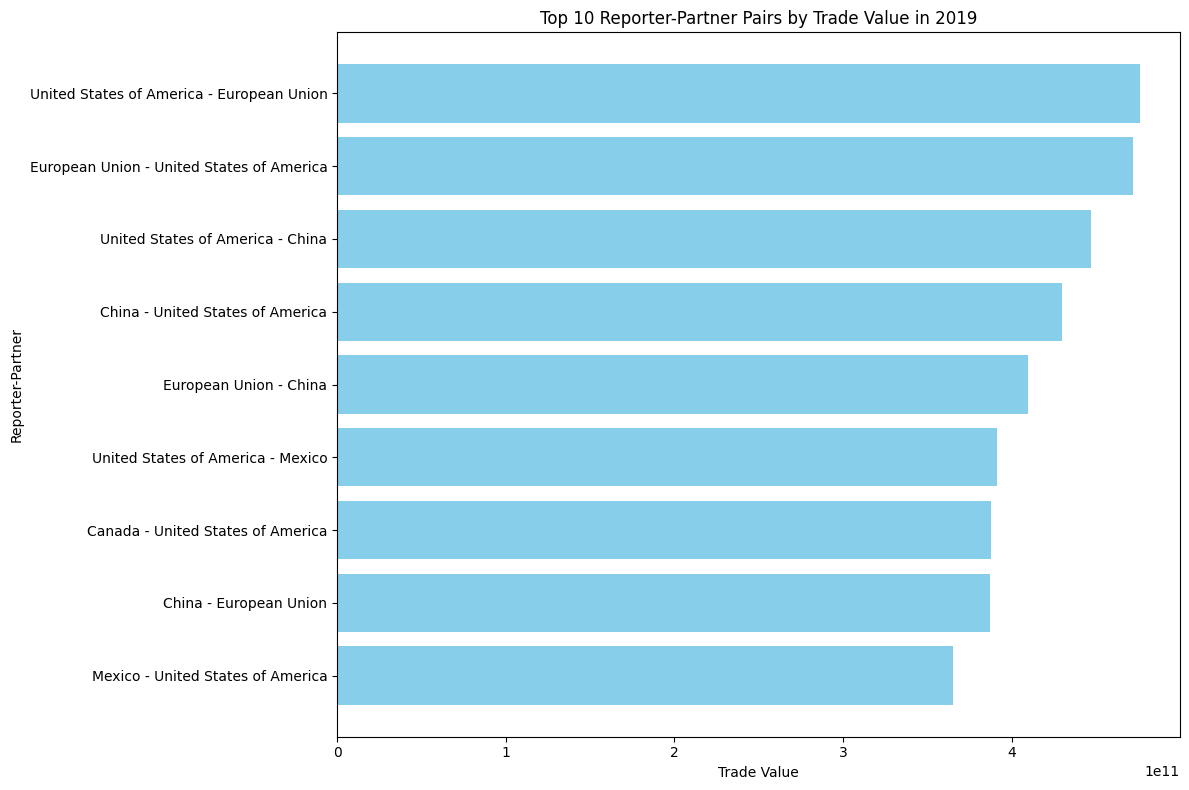

In [40]:
# Filter data for the year 2019
data_2019 = tradedata[['reporter_partner', 'year_2019']].copy()

# Rename the column for clarity
data_2019.columns = ['reporter_partner', 'trade_value']

# Sort and get the top 10 reporter_partner pairs
top_10_2019 = data_2019.sort_values(by='trade_value', ascending=False).head(10)

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10_2019['reporter_partner'], top_10_2019['trade_value'], color='skyblue')

# Adding title and labels
plt.title('Top 10 Reporter-Partner Pairs by Trade Value in 2019')
plt.xlabel('Trade Value')
plt.ylabel('Reporter-Partner')

# Invert y-axis to show the highest values at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


## Task 3.3 Key insights


## A. Evoluation of regional trade agrrements, 1961-2024

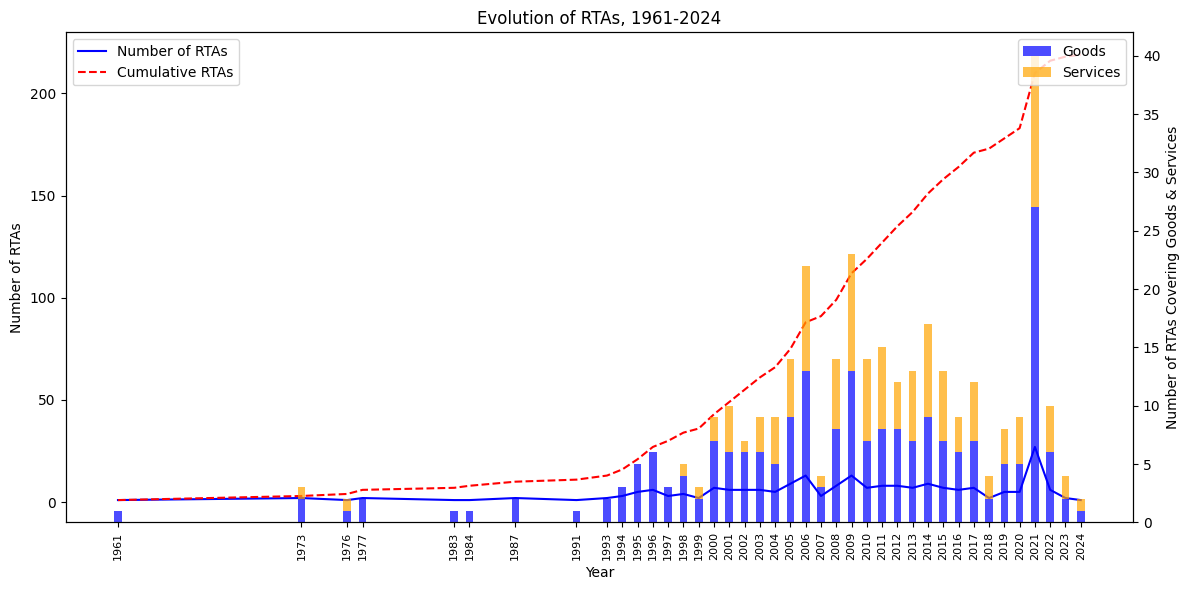

### 1. New RTAs Created by Year

Since 1961, the number of Regional Trade Agreements (RTAs) has grown significantly, with more than 200 notified to the World Trade Organization (WTO) by 2024. This expansion reflects the increasing importance of preferential trade agreements in global trade policy, driven by the desire of countries to deepen economic ties and secure market access beyond multilateral agreements.

### 2. Notable Years for RTA Signings

- **2006:** This year marked a peak in the creation of RTAs, with several significant agreements signed. This surge can be attributed to the proliferation of Free Trade Agreements (FTAs) and Economic Integration Agreements (EIAs), as countries sought to bolster their economic relationships amidst a stalling Doha Round of multilateral trade negotiations under the WTO.

- **2019 and 2021:** These years also saw a notable number of RTAs being signed. The increase in 2019 can be linked to a global trend toward bilateral and regional agreements as countries aimed to secure stable trade relations in an uncertain global trade environment, exacerbated by geopolitical tensions and trade wars. The high number in 2021 can be partly explained by the aftermath of the COVID-19 pandemic, where countries prioritized securing supply chains, diversifying trade partners, and ensuring economic recovery through enhanced trade cooperation. The pandemic highlighted vulnerabilities in global trade, pushing countries to formalize trade relations more rigorously.

### 3. RTAs Covering Goods vs. Services

RTAs that cover trade in goods (FTAs, Customs Unions - CUs, and Partial Scope Agreements - PSAs) dominate the landscape of regional trade agreements. These agreements are generally more common because they are easier to negotiate and implement compared to those that include services, which often involve more complex regulatory alignments and mutual recognition of standards. The significant presence of goods-focused RTAs reflects the traditional priority of countries to secure tariff reductions and market access for physical goods.

### 4. Trends in RTAs Covering Services (EIAs)

While the number of RTAs covering services (EIAs) has grown, they have shown a somewhat slower pace of increase compared to goods agreements. In recent years, particularly after the early 2010s, there has been a plateau or even a decline in the rate at which new EIAs are being signed. This trend could be due to the inherent complexities in harmonizing regulations across countries for services, which often involve sensitive domestic regulations and standards. Moreover, the focus on goods trade agreements remains prominent as countries continue to emphasize traditional trade routes and commodities in their economic strategies. However, this does not imply a complete downturn, as the digitalization of economies and the rise of e-commerce might drive future growth in EIAs, particularly in technology and service-based sectors.


## B. Percentage of RTAs Types Distribution, 1961-2024

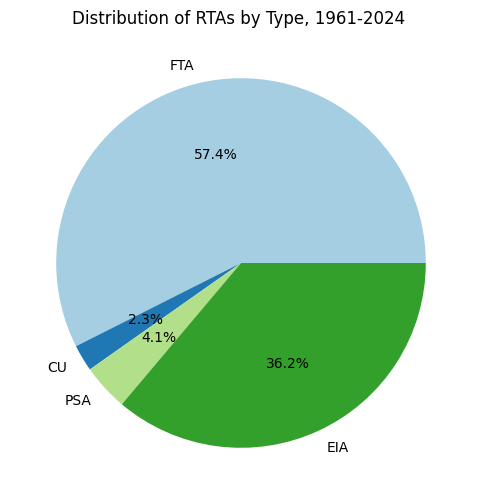

### 1. Free Trade Agreements (FTAs)

Free Trade Agreements (FTAs) constitute the majority of RTAs, accounting for **57.4%** of the total. The dominance of FTAs reflects their popularity as a tool for countries to liberalize trade on a broad scale, primarily by reducing or eliminating tariffs on goods. The widespread adoption of FTAs is driven by the desire to foster economic growth, enhance market access, and integrate more deeply into the global economy. FTAs are relatively easier to negotiate compared to more complex agreements like Customs Unions, as they allow member countries to maintain their own external trade policies with non-member states.

### 2. Economic Integration Agreements (EIAs)

Economic Integration Agreements (EIAs) are the second most common type of RTA, making up **36.2%** of the total. EIAs focus on liberalizing trade in services, which has become increasingly important in the global economy. The significant share of EIAs highlights the growing recognition among countries of the need to integrate services markets alongside goods trade. Services such as finance, telecommunications, and professional services are crucial for modern economies, and EIAs facilitate the cross-border provision of these services, enhancing economic ties between countries. The relatively high proportion of EIAs indicates the shift towards a more service-oriented global economy.

### 3. Partial Scope Agreements (PSAs)

Partial Scope Agreements (PSAs) rank third, comprising approximately **4%** of the total RTAs. PSAs are more limited in scope, covering only specific sectors or products rather than the entire spectrum of trade between member countries. The lower percentage of PSAs reflects their use as more targeted tools for trade liberalization, often employed in situations where full-scale trade agreements are not feasible or desirable. PSAs are typically favored by countries that wish to liberalize trade incrementally or focus on specific industries where they have a comparative advantage.

### 4. Customs Unions (CUs)

Customs Unions (CUs) occupy the last place, representing around **2%** of the total RTAs. CUs are more complex to establish and maintain because they require member countries to not only liberalize internal trade but also adopt a common external tariff on imports from non-member countries. The low percentage of CUs indicates that while they offer deep integration, the political and economic challenges involved in forming such unions make them less common than other types of RTAs. Countries may be reluctant to cede control over their external trade policies, which explains the relatively small number of CUs compared to FTAs and EIAs.

## C. Breakdown of RTAs Types, 1961-2024

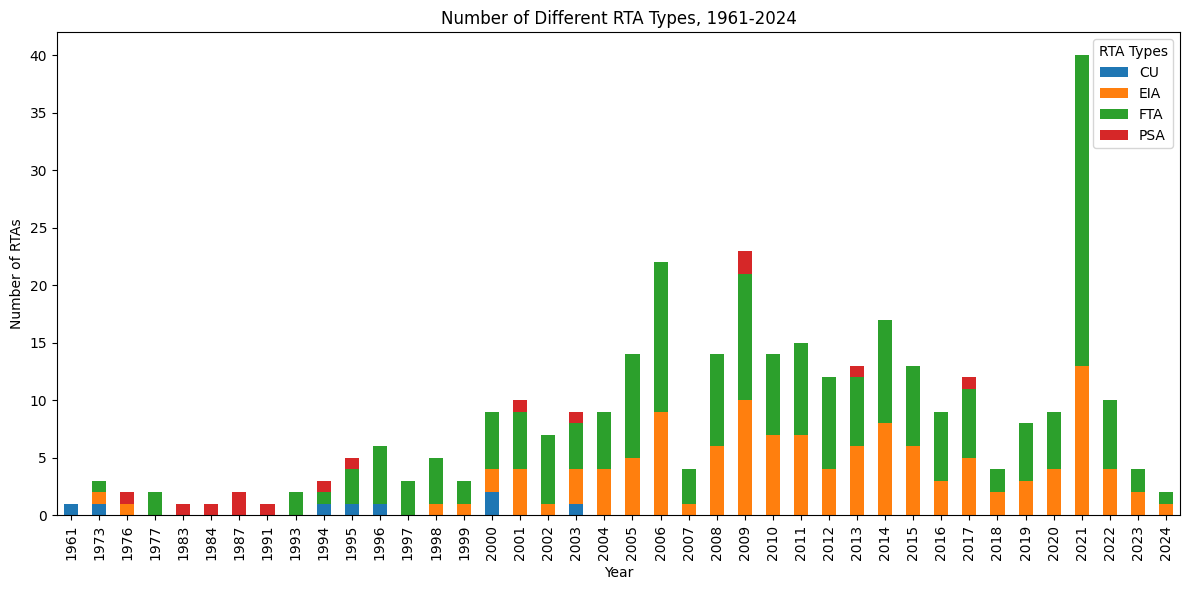

### 1. Customs Unions (CUs)

Customs Unions have not been created since 2003. The cessation of new CUs can be attributed to the complexity and rigidity associated with forming such agreements. Unlike FTAs, CUs require member countries to adopt a common external tariff for non-members, which can be politically and economically challenging to negotiate and maintain. As global trade dynamics evolved, countries increasingly preferred the flexibility of FTAs over the stringent requirements of CUs.

### 2. Partial Scope Agreements (PSAs)

PSAs have been created irregularly over the years. From 1983 to 1991, all RTAs created were PSAs. This period saw countries experimenting with selective trade liberalization, focusing on specific sectors or products rather than comprehensive agreements. The preference for PSAs during this time might reflect the cautious approach of countries testing the waters of trade liberalization.

Significant PSAs were signed in 2001, 2003, 2013, and 2017. These instances likely correspond to strategic economic or political considerations, such as the need to boost trade in certain industries or the desire to strengthen bilateral relations without committing to full-scale trade agreements. The sporadic nature of PSA signings reflects their use as targeted tools rather than broad, all-encompassing trade policies.

### 3. Free Trade Agreements (FTAs)

FTAs have shown an upward trend from 1993 to 2006, reflecting the global shift towards more liberalized trade during the post-Cold War era. The proliferation of FTAs during this period was driven by the desire to reduce tariffs, enhance market access, and integrate more deeply into the global economy.

However, there was a downward trend from 2009 to 2020. This decline can be linked to the global financial crisis of 2008, which led to a more cautious approach to trade liberalization as countries prioritized economic recovery. Additionally, rising protectionism and trade disputes in the 2010s, especially between major economies like the US and China, may have contributed to the slowdown in FTA creation.

FTAs peaked in 2021, likely due to the aftermath of the COVID-19 pandemic. Countries sought to secure and diversify their trade relations in response to disruptions in global supply chains, leading to a surge in FTA signings. However, this was followed by a decline as the initial urgency waned and countries reassessed their trade strategies in a still-uncertain global environment.

### 4. Economic Integration Agreements (EIAs)

EIAs were first signed in 1973 and 1976 but then saw no new signings until 1989. The initial slow uptake of EIAs reflects the complexity of liberalizing trade in services, which often involves harmonizing regulations and standards across countries.

From 1989 onwards, EIAs showed an upward trend until 2006, driven by the increasing importance of services in the global economy and the need for countries to enhance their competitiveness in this sector. The proliferation of EIAs during this period aligns with the broader trend of globalization and the expansion of service industries.

Like FTAs, EIAs experienced a decline from 2009 to 2020, likely due to similar factors such as the global financial crisis, rising protectionism, and economic uncertainties. The peak in 2021 can be attributed to the post-pandemic focus on securing services trade, especially in digital services, as economies became more reliant on online platforms during the pandemic. The subsequent decline reflects a stabilization in trade policy priorities as countries adjusted to the new normal.

### 5. Relationship Between FTAs and EIAs

FTAs and EIAs have often been created hand in hand, showing similar patterns over time. This parallel development reflects the interlinked nature of goods and services in modern trade agreements. As countries sought to liberalize trade comprehensively, they negotiated FTAs and EIAs together to cover both goods and services, ensuring broader economic integration. The similar trends in their creation, with peaks and declines occurring in the same periods, highlight the synchronized approach countries have taken in expanding their trade relationships across sectors.

## D. Distribution of RTAs by Composition and Crossregional

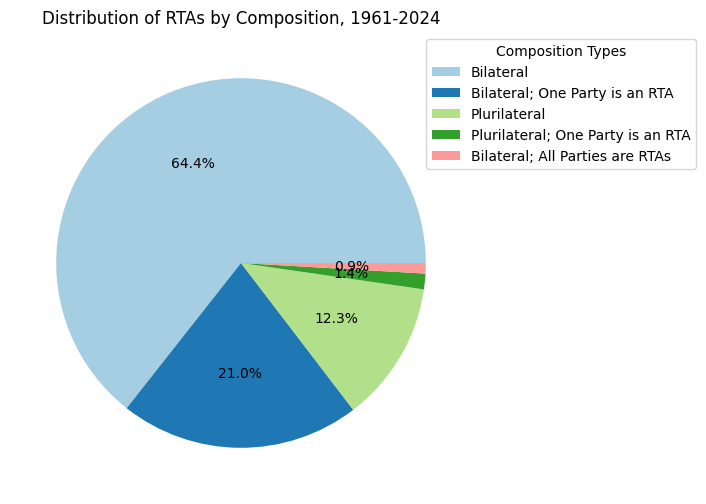

More than 80% of Regional Trade Agreements (RTAs) are bilateral agreements, meaning they involve only two parties. Among these bilateral agreements, 21% include one party that is a regional group, such as the European Union or the ASEAN bloc.  The fact that 21% of these bilateral agreements involve a regional group as one of the parties underscores the significance of regional organizations in global trade.

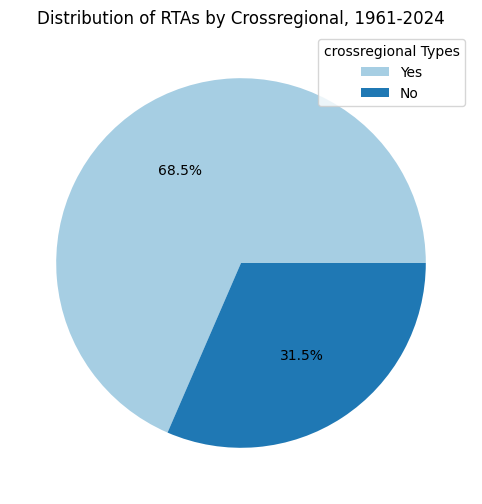

Nearly 70% of Regional Trade Agreements (RTAs) are signed between countries within the same geographical region, reflecting the strong influence of proximity on trade relationships. Regional RTAs allow neighboring countries to capitalize on shared economic interests, cultural connections, and logistical advantages, leading to more efficient trade flows and deeper economic integration. 

## E. Top 10 Countries/ Territories by Number of RTAs, 1961-2024

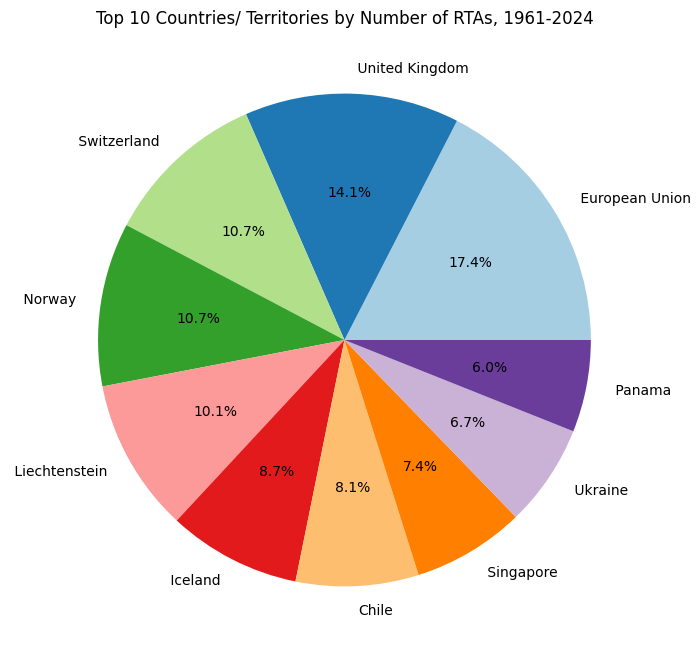

The following countries and territories are the top 10 by the number of RTAs they have participated in:

1. **European Union (EU)**
2. **United Kingdom (UK)**
3. **Switzerland**
4. **Norway**
5. **Liechtenstein**
6. **Iceland**
7. **Chile**
8. **Singapore**
9. **Ukraine**
10. **Panama**

### 1. European Union (EU)

The European Union is the leading entity in terms of RTA participation. As a supranational organization, the EU negotiates trade agreements on behalf of its member states, resulting in a large number of RTAs. The EU’s trade policy aims to open up markets, establish rules that ensure fair trade, and promote sustainable development. The EU’s extensive network of RTAs is a testament to its role as a major player in global trade.

### 2. United Kingdom (UK)

The United Kingdom has been an active participant in RTAs, especially following Brexit. After leaving the EU in 2020, the UK pursued numerous bilateral and multilateral trade agreements to replace those it had under the EU framework. The UK’s efforts to establish itself as a global trading nation post-Brexit have resulted in a high number of RTAs.

### 3. Switzerland

Switzerland, known for its robust economy and strategic trade policies, has participated in numerous RTAs. As a member of the European Free Trade Association (EFTA), Switzerland has secured multiple trade agreements both within Europe and globally. Switzerland’s commitment to maintaining strong trade ties is reflected in its extensive RTA network.

### 4. Norway

Norway, like Switzerland, is an EFTA member and has leveraged this position to engage in many RTAs. Norway’s economy, heavily dependent on exports, particularly in the energy sector, benefits significantly from its participation in RTAs. These agreements help Norway secure favorable trade terms and access to key markets.

### 5. Liechtenstein

Liechtenstein, a small but economically prosperous country, is also an EFTA member. Despite its size, Liechtenstein’s participation in numerous RTAs underscores its commitment to maintaining strong economic relations and benefiting from global trade opportunities.



## F. Top 10 Countries/ Territories in Total Trade, over years

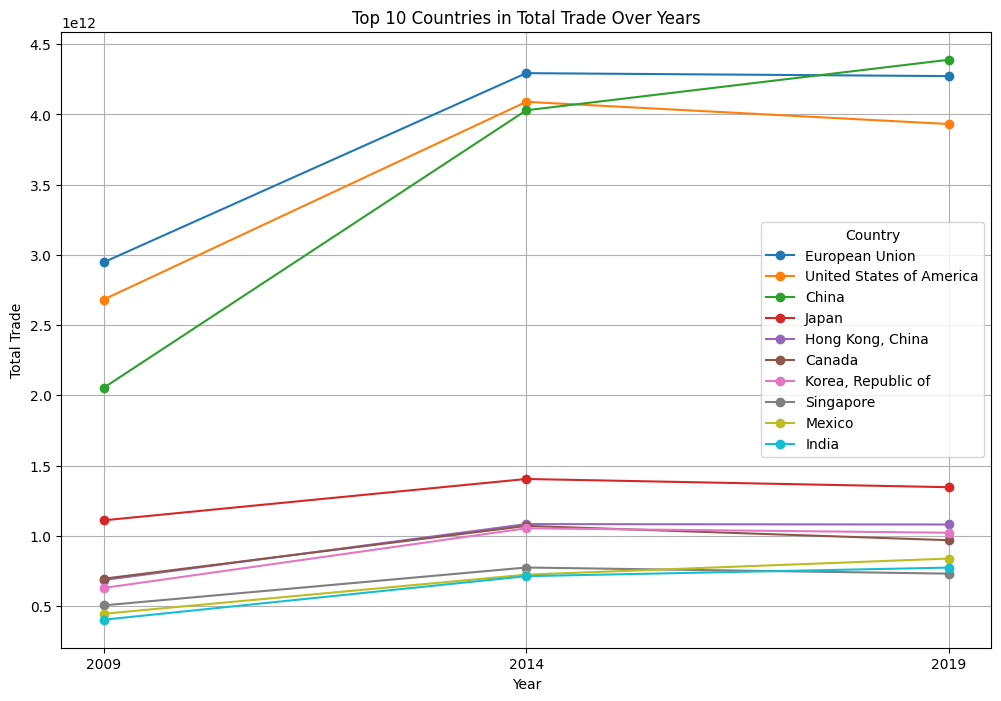

Starting from 2009, there has been an upward trend in trade volumes between key global trading partners, particularly among the European Union (EU), the United States (US), and China. This increase in trade volume is indicative of several economic and geopolitical developments that have shaped global trade dynamics during this period.

1. Economic Recovery Post-2008 Financial Crisis
Global Economic Rebound: The year 2009 marks a significant recovery phase following the 2008 global financial crisis. Stimulus measures and economic reforms implemented by major economies, including the US, EU, and China, led to a resurgence in economic activity and a subsequent increase in trade volumes.
Increased Global Demand: As global markets stabilized, demand for goods and services rose, driving trade volumes higher. The US, EU, and China, being major players in global trade, naturally experienced substantial increases in their trading activities.
1. Rising Importance of China in Global Trade
China’s Economic Expansion: China continued its rapid economic growth, further solidifying its position as a global manufacturing hub. The country's expanding industrial capacity and increasing role in global supply chains contributed significantly to the rise in trade volumes.
Strategic Partnerships and Trade Agreements: China’s active engagement in forming trade partnerships, including its participation in various regional trade agreements (RTAs), facilitated greater access to international markets, boosting trade flows with major economies like the US and EU.
1. Significance of 2009 in RTA Activity
First Peak in RTAs: The year 2009 is also notable for witnessing the first peak in the number of RTAs (Regional Trade Agreements) in effect. This surge in RTAs can be attributed to the global response to the economic downturn, where countries sought to secure and stabilize their trade relationships through preferential trade agreements.
Expansion of Free Trade Agreements (FTAs): The increase in FTAs during this period, particularly among the EU, US, and China, played a crucial role in reducing trade barriers, fostering economic cooperation, and ultimately leading to higher trade volumes. These agreements often included provisions for tariff reductions, improved market access, and stronger economic ties between signatory nations.
1. Technological Advancements and Globalization
Digitalization and Trade: The post-2009 era also saw significant advancements in technology, particularly in digital infrastructure and logistics, which facilitated smoother and more efficient trade processes. This technological progress contributed to the seamless flow of goods and services across borders.
Global Supply Chains: The further integration of global supply chains during this period, with the US, EU, and China playing pivotal roles, ensured that trade volumes remained high as these economies became increasingly interdependent.
  

- The European Union (EU) ranks **1st** with a total trade value of \(1.151457 \times 10^{13}\) across the years 2009, 2014, and 2019.
  - The EU is also ranked 1st in terms of the number of Regional Trade Agreements (RTAs) signed. This reflects its significant trade volume and active participation in trade agreements globally.

- **Singapore**:
  - Singapore is ranked **8th** in terms of total trade volume.
  - It is also among the top 10 countries in terms of the number of RTAs signed from 1961 to 2024.
  - Singapore’s high ranking in both total trade and RTAs signifies its strategic importance and active trade policy.

- **US, China, Japan**:
  - Despite the US, China, and Japan not being listed in the top 10 countries with the highest number of RTAs, they are among the top 5 in terms of trade volume.
  - **Reasons for this discrepancy include**:
    - **Coverage Period**: These countries may have significant trade volumes but might not cover the entire span from 1961 to 2024 in terms of RTA counts. Their RTA activity might have increased recently or been less concentrated in earlier periods.
    - **Trade Volume vs. RTA Count**: A country’s trade volume does not necessarily correlate directly with the number of RTAs. For instance, countries with extensive trade networks might not have as many agreements but still engage in substantial global trade.


In [41]:
top_10_countries

,year_2009,year_2014,year_2019,Total_trade
reporter,,,,
European Union,2.947037e+12,4.294240e+12,4.273298e+12,1.151457e+13
United States of America,2.681475e+12,4.090131e+12,3.931896e+12,1.070350e+13
China,2.052844e+12,4.029893e+12,4.389941e+12,1.047268e+13
Japan,1.109462e+12,1.404029e+12,1.345489e+12,3.858980e+12
"Hong Kong, China",6.840828e+11,1.082620e+12,1.079877e+12,2.846580e+12
Canada,6.936478e+11,1.069834e+12,9.678219e+11,2.731303e+12
"Korea, Republic of",6.276637e+11,1.052820e+12,1.021108e+12,2.701592e+12
Singapore,5.037761e+11,7.735012e+11,7.298429e+11,2.007120e+12
Mexico,4.439462e+11,7.226009e+11,8.374420e+11,2.003989e+12


## G. Top 10 Reporter-Partner in Total Trade, over years

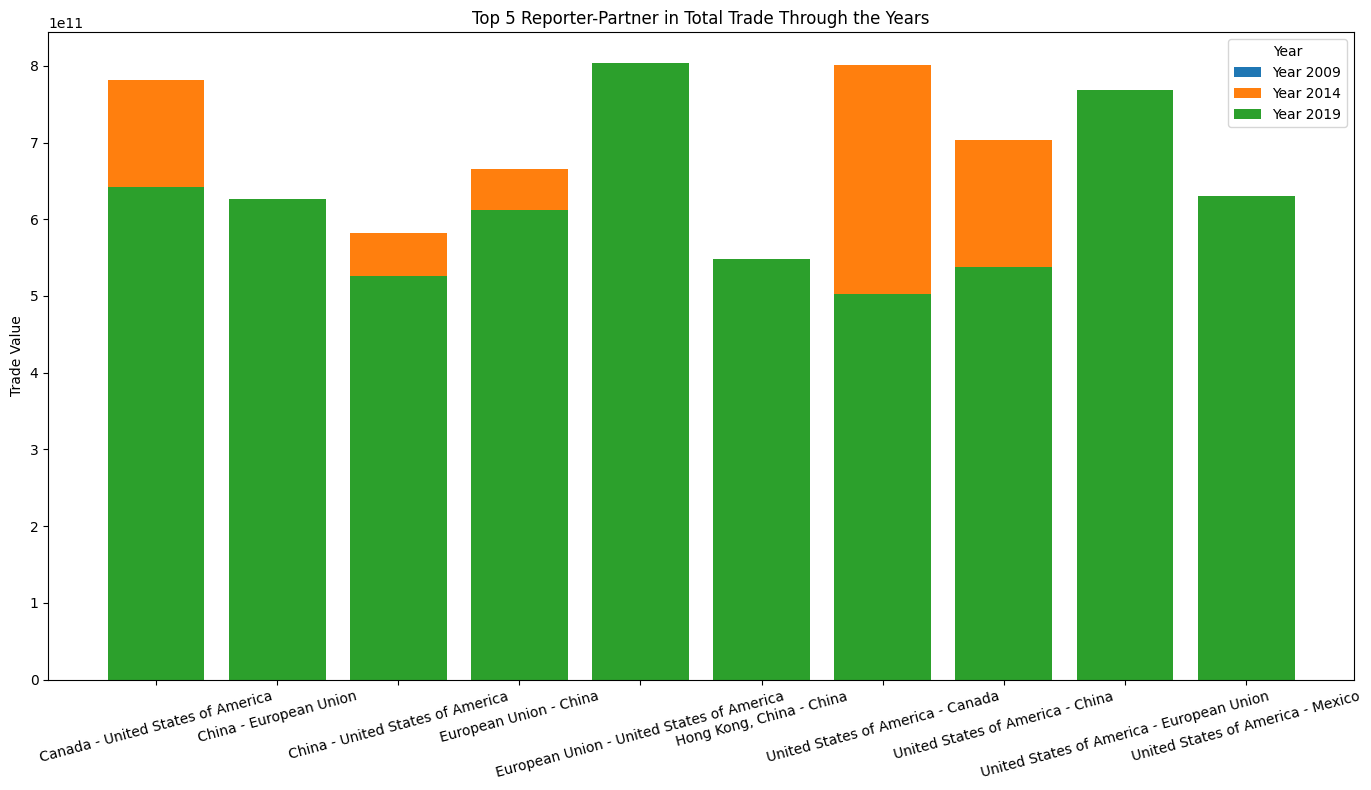

The top 10 reporter-partner pairs in terms of total trade volume over the years are:

1. **European Union; United States of America**
2. **Canada; United States of America**
3. **United States of America; European Union**
4. **United States of America; Canada**
5. **United States of America; China**
6. **European Union; China**
7. **China; European Union**
8. **Hong Kong, China; China**
9. **China; United States of America**
10. **United States of America; Mexico**

### Shared Reasons for High Trade Volumes

#### 1. Economic Size and Market Potential

- **Large Economies**: The United States, European Union, China, and Canada are among the largest economies globally. Their substantial economic activity and large consumer markets naturally lead to high trade volumes.
- **Diverse Economies**: These countries have diverse economic sectors that complement each other. For instance, the US is strong in technology and services, while China excels in manufacturing.

#### 2. Trade Agreements and Economic Partnerships

- **Free Trade Agreements**: Trade agreements such as NAFTA/USMCA (between the US, Canada, and Mexico) and the Comprehensive Agreement on Investment (CAI) between the EU and China significantly boost trade by reducing tariffs and facilitating smoother trade flows.
- **Bilateral Agreements**: Many of these pairs benefit from bilateral trade agreements that enhance trade relations and reduce barriers.

#### 3. Geographical Proximity

- **US-Canada and US-Mexico**: Geographic proximity facilitates trade through shorter transportation routes and reduced shipping costs. For example, the US-Canada trade relationship benefits from shared borders and well-established logistics.
- **Hong Kong and China**: Hong Kong’s role as a major trade hub and gateway to China enhances trade between the two, with Hong Kong acting as an intermediary for trade between China and the rest of the world.

#### 4. Complementary Trade Interests

- **Product Complementarity**: Trade pairs often involve complementary products. For instance, the US imports electronics and machinery from China while exporting agricultural products and high-tech goods to China.
- **Service and Goods Trade**: Many of these pairs engage in both goods and services trade, reflecting their diverse economic portfolios and mutual needs.

#### 5. Established Trade Relationships and Historical Ties

- **Historical Trade Ties**: Long-standing trade relationships rooted in historical agreements and economic policies contribute to high trade volumes. For example, the US-EU trade ties date back to early 20th-century agreements.
- **Established Trade Routes**: Long-established trade routes and business connections reinforce high trade volumes between these countries.

#### 6. Economic Integration and Global Supply Chains

- **Global Supply Chains**: Integration into global supply chains means that these countries are embedded in each other’s supply networks. For example, China is a major supplier of components used in products exported by the US and EU.
- **Investment and Corporate Presence**: High levels of investment and corporate presence (e.g., US companies operating in China and vice versa) enhance trade interactions.

#### 7. Market Demand and Consumption Patterns

- **High Demand Markets**: Countries like the US and EU have high consumer demand for diverse goods, which drives imports from countries like China and Canada. Conversely, countries with manufacturing bases (like China) seek markets for their products.

In [42]:
top_5_reporter_partner

4835     European Union - United States of America
2842             Canada - United States of America
15107    United States of America - European Union
15089            United States of America - Canada
15091             United States of America - China
4729                        European Union - China
3026                        China - European Union
5902                      Hong Kong, China - China
3117              China - United States of America
15143            United States of America - Mexico
Name: reporter_partner, dtype: object

## Task 3.4 Assess whether the presence of an RTA actually increases trade between the parties.

In [43]:
total_trade_2009 = merged_total_trade_per_year_reporter['year_2009'].sum()
total_trade_2014 = merged_total_trade_per_year_reporter['year_2014'].sum()
total_trade_2019 = merged_total_trade_per_year_reporter['year_2019'].sum()

In [44]:
total_rta_2009 = rta_counts_per_year.get(2009, 0)
total_rta_2014 = rta_counts_per_year.get(2014, 0)
total_rta_2019 = rta_counts_per_year.get(2019, 0)


In [45]:
time_series_data = pd.DataFrame({
    'Year': [2009, 2014, 2019],
    'Number_of_RTAs': [total_rta_2009, total_rta_2014, total_rta_2019],
    'Total_Trade_Value': [total_trade_2009, total_trade_2014, total_trade_2019]
})

# Set 'Year' as the index
time_series_data.set_index('Year', inplace=True)

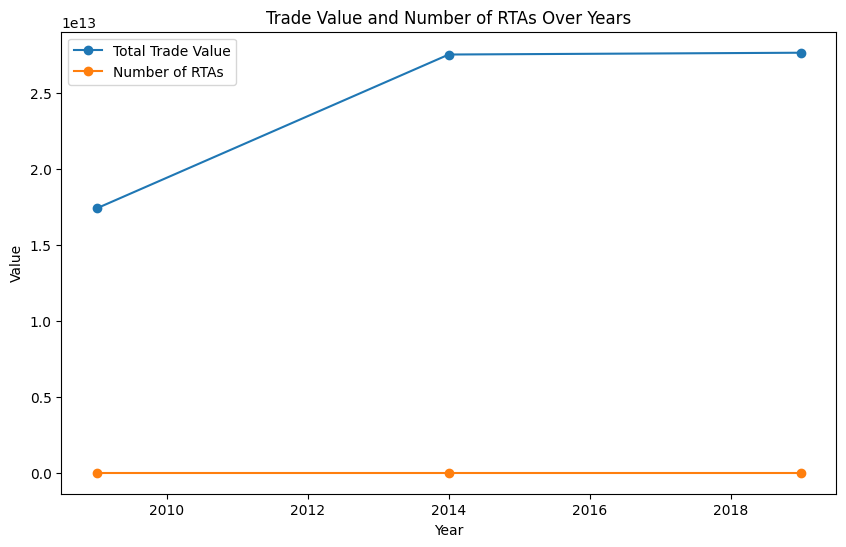

In [46]:
# Plot the time series data
plt.figure(figsize=(10, 6))

# Plot Total Trade Value
plt.plot(time_series_data.index, time_series_data['Total_Trade_Value'], marker='o', label='Total Trade Value')

# Plot Number of RTAs
plt.plot(time_series_data.index, time_series_data['Number_of_RTAs'], marker='o', label='Number of RTAs')

# Add titles and labels
plt.title('Trade Value and Number of RTAs Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.show()

In [47]:
# Compute the correlation matrix
correlation_matrix = time_series_data[['Number_of_RTAs', 'Total_Trade_Value']].corr()

# Extract the correlation coefficient between Number_of_RTAs and Total_Trade_Value
correlation_value = correlation_matrix.loc['Number_of_RTAs', 'Total_Trade_Value']

In [48]:
# Display the correlation matrix and the specific correlation value
print("Correlation Matrix:")
print(correlation_matrix)
print(f"\nCorrelation between Number_of_RTAs and Total_Trade_Value: {correlation_value:.2f}")

Correlation Matrix:
                   Number_of_RTAs  Total_Trade_Value
Number_of_RTAs           1.000000          -0.871016
Total_Trade_Value       -0.871016           1.000000

Correlation between Number_of_RTAs and Total_Trade_Value: -0.87


## Correlation Analysis between Number of RTAs and Total Trade Value

A correlation coefficient of **-0.87** between the **Number_of_RTAs** and **Total_Trade_Value** indicates a significant inverse relationship. This strong negative correlation suggests that as the number of RTAs increases, the total trade value tends to decrease. While this points to a notable pattern in the data, it is essential to delve deeper to understand the underlying causes and implications of this relationship.

### Possible Explanations:

- **Trade Dynamics**: The negative correlation may be attributed to factors such as market saturation or diminishing returns from additional trade agreements. As more RTAs are signed, the incremental benefit to total trade value might decrease.

- **Policy Impact**: It is possible that additional RTAs are not significantly boosting trade value. Alternatively, other factors beyond the number of RTAs could be influencing trade volumes.

### Important Note

Please **note** that this correlation analysis is based on data spanning only the years 2009, 2014, and 2019. The limited number of data points and the absence of intermediate years imply that our findings may not fully capture the broader relationship between these variables. To gain a more comprehensive understanding, further analysis with a more extensive dataset and a longer time series would be beneficial. This would provide a clearer picture and enhance the robustness of the conclusions drawn.
